<h1>2022.04.07. 강의 시간내 실습</h1>

In [135]:
## warning ignore
import warnings

warnings.filterwarnings('ignore')

In [136]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df_wine_feature = wine.feature_names
df_wine_data = pd.DataFrame(wine.data, columns = df_wine_feature)
df_wine_label = pd.DataFrame(wine.target, columns = ['label'])
## df_wine['target'] = wine.target

In [137]:
df_wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<h3>결측치 제거</h3>

In [138]:
df_wine_data.isnull().sum()

## 결측치 없음

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

<h3>Dataframe 통일</h3>

In [139]:
data = pd.concat([df_wine_data, df_wine_label], axis=1)

In [140]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [141]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

In [142]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


<h3>Label의 개수 및 분포</h3>

Text(0.5, 1.0, 'Label')

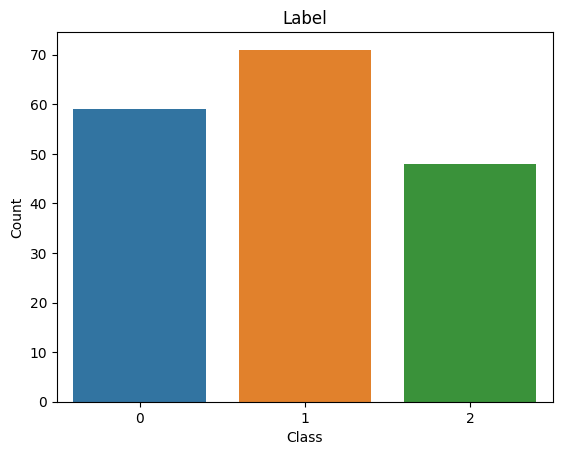

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = data, x="label")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

<h3>Class에 따른 hue 분포</h3>

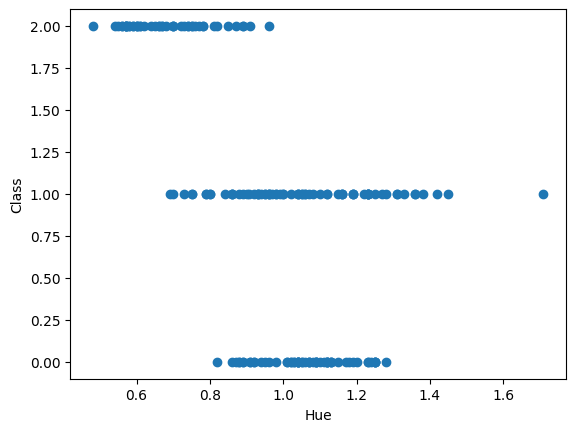

In [144]:
plt.scatter(data['hue'], data['label'])
plt.xlabel('Hue')
plt.ylabel('Class')

plt.show()

<h3>Class별 color intensity의 값 볌위 표시</h3>

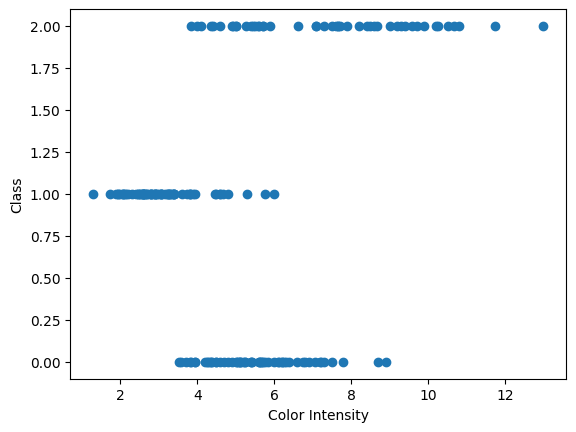

In [145]:
plt.scatter(data['color_intensity'], data['label'])
plt.xlabel('Color Intensity')
plt.ylabel('Class')

plt.show()

<h3>hue와 color intensity의 관계 확인</h3>

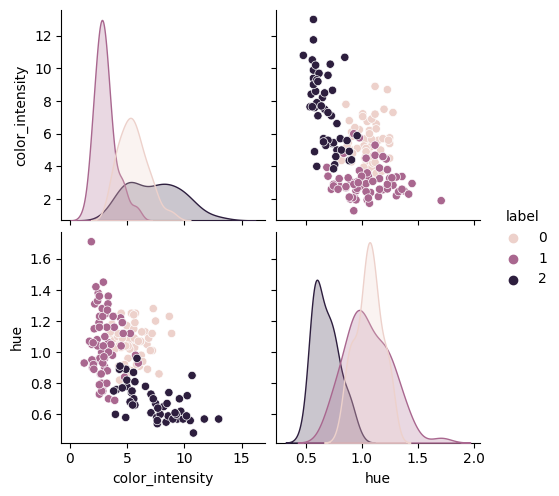

In [146]:
sns.pairplot(data, vars=['color_intensity', 'hue'], hue ='label')
plt.show()

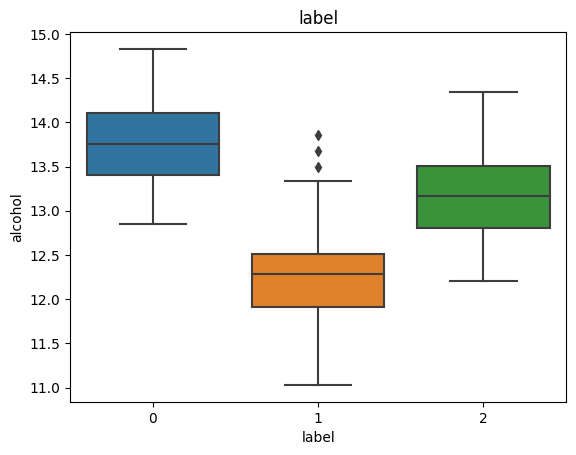

In [147]:
sns.boxplot(x="label", y='alcohol', data=data)
plt.title("label")
plt.show()

<h2>Classification</h2>

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_wine_data, df_wine_label, test_size=0.2)

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<h3>SGDClassifier</h3>

In [150]:
from sklearn.linear_model import SGDClassifier

<h4>pandas dataset</h4>

In [151]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(X_train, y_train)

print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.647887323943662
0.6666666666666666


<h4>numpy dataset</h4>

In [152]:
wine_input = df_wine_data.to_numpy()
wine_target = df_wine_label.to_numpy()

In [153]:
sc_X_train, sc_X_test, sc_y_train, sc_y_test = train_test_split(wine_input, wine_target, random_state=42)

In [154]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(sc_X_train, sc_y_train)

print(sc.score(sc_X_train, sc_y_train))
print(sc.score(sc_X_test, sc_y_test))

0.5338345864661654
0.5555555555555556


In [155]:
train_score = []
test_score = []

classes = np.unique(y_train)

In [156]:
for _ in range(0, 300):
    sc.partial_fit(X_train, y_train, classes=classes)
    
    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test, y_test))

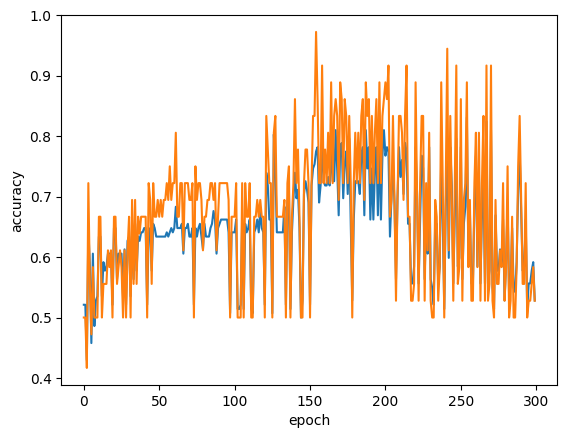

In [157]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

<h3>KNN</h3>

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train.values.ravel())
prediction = knn_model.predict(X_test)

z_scaled_accuracy = knn_model.score(X_test, y_test)

print(z_scaled_accuracy)

0.6944444444444444


<h2>Validation</h2>

In [159]:
sub_input, val_input, sub_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [160]:
print(sub_input.shape, val_input.shape)

(113, 13) (29, 13)


In [161]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.9655172413793104


<h3>Cross-Validation</h3>

In [162]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)
print(scores)

{'fit_time': array([0.00551248, 0.00507617, 0.00605249, 0.00549912, 0.00400567]), 'score_time': array([0.0035131 , 0.004498  , 0.0035069 , 0.00453138, 0.00398207]), 'test_score': array([0.93103448, 0.82758621, 0.89285714, 0.89285714, 0.96428571])}


In [163]:
import numpy as np

print(np.mean(scores['test_score']))

0.9017241379310346


In [164]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, X_train, y_train, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.9017241379310346


In [165]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))

0.8957142857142857
